In [45]:
class AdaptiveTemporalDensityFilter: # Renamed class for clarity
    def __init__(self, resolution, adaptation_rate=0.05, decay_rate=0.035, density_threshold=1.0): # Added density_threshold
        self.resolution = resolution
        self.adaptation_rate = adaptation_rate
        self.decay_rate = decay_rate
        self.density_map = np.zeros(resolution, dtype=np.float32) # Renamed to density_map
        self.density_threshold = density_threshold # New parameter

    def apply(self, events):
        filtered_events = []
        num_events_before = len(events)

        for event in events:
            x, y = int(event[1]), int(event[2])
            valid_coords = (0 <= x < self.resolution[0] and 0 <= y < self.resolution[1])

            if valid_coords:
                current_density = self.density_map[x, y] # Renamed to current_density
                self.density_map[x, y] += self.adaptation_rate # Still adapt density map
                if current_density <= self.density_threshold: # Filtering based on density threshold
                    filtered_events.append(event)
                self.density_map[x, y] *= (1 - self.decay_rate)

            else:
                print("Invalid coordinates!", x, y, self.resolution)

        #print("After applying: min density =", np.min(self.density_map), " max density =", np.max(self.density_map)) # Renamed to density
        #print("Reduction: %d events" % (num_events_before - len(filtered_events)))

        return np.array(filtered_events)

In [46]:
filter = AdaptiveTemporalDensityFilter(resolution=(346, 260))
idx=0
while idx < N:
    events = np.load(join("data/test/events/data" , 'events_{:010d}.npy'.format(idx))) 
    filtered = filter.apply(events)
    print(len(filtered)/len(events))
    idx += 1
#print(len(values))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9989175815679604
0.9962300863431838
0.994772775762748
0.9910139782560462
0.9898713060057197
0.9871406959152799
0.9870712401055409
0.9810197245999256
0.9861979166666667
0.9790583082398029
0.9795983423653172
0.9757097791798107
0.9756743130829342
0.9789911485549749
0.9829001367989056
0.9778347213324792
0.9697013210798392
0.9625906008884733
0.9501723946168391
0.9459313327926466
0.9489113017249505
0.9513725490196079
0.9652852852852852
0.970801317233809
0.9720997123681687
0.968567092998049
0.9665458141067897
0.9503893214682981
0.9458719460825611
0.9405852793378658
0.9531294655615891
0.9434850863422292
0.9536368684064409
0.9295774647887324
0.9378268448576409
0.9285056765879104
0.9430510475066392
0.9341882409871763
0.9330927262631871
0.9420752565564424
0.9304010349288486
0.9454461396208969
0.9347879990081825
0.9410193177147554
0.944573725407235
0.944895199459094
0.9510821227394012
0.9815160113498176
0.9876637139285909
0.990278628291488
0.9897772516

In [ ]:
import numpy as np
from os.path import join
resolution = 346, 260
N = 1000
width, height = resolution
idx=0
values = []

while idx < N:
    events = np.load(join("data/test/events/data" , 'events_{:010d}.npy'.format(idx))) 
    grid = np.zeros((width, height), dtype=np.int32)
    #print('In density: ', events.shape)
    for event in events:
        x, y = int(event[1]), int(event[2])
        if 0 <= x < width and 0 <= y < height:
            grid[x, y] += 1
    values.extend(grid.flatten())
    idx += 1
#print(len(values))

In [6]:
max(grid.flatten())

np.int32(9)

(array([8.6150163e+07, 3.3404440e+06, 3.6393000e+05, 8.0081000e+04,
        1.8326000e+04, 4.3530000e+03, 1.4010000e+03, 5.9000000e+02,
        3.0800000e+02, 1.5800000e+02, 9.7000000e+01, 6.0000000e+01,
        4.2000000e+01, 2.0000000e+01, 1.3000000e+01, 7.0000000e+00,
        4.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.0000000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

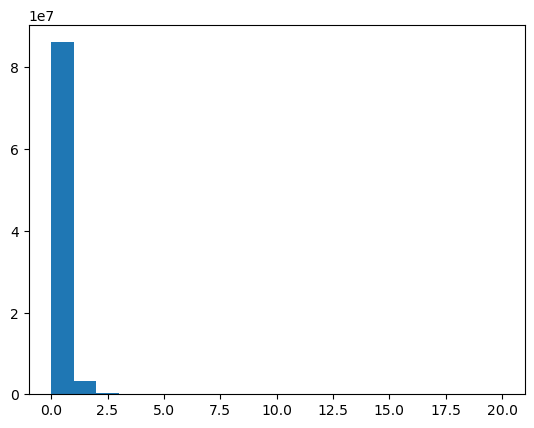

In [4]:
import matplotlib.pyplot as plt

plt.hist(values, bins=20)

In [11]:
np.count_nonzero(values)/len(values)


KeyboardInterrupt: 

In [12]:
values_np=np.array(values)

(array([3340444.,       0.,       0.,  363930.,       0.,       0.,
              0.,       0.,   80081.,       0.,       0.,       0.,
              0.,       0.,       0.,   18326.,       0.,       0.,
              0.,       0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.]),
 <BarContainer object of 20 artists>)

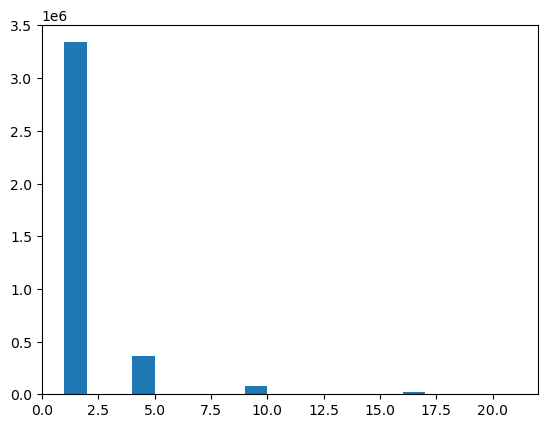

In [17]:
plt.hist(values_np[values_np>0]**2, bins=20, range=(1,21))

In [ ]:
plt.hist(np.array(values)**2, bins=20)